# Catch Joe - Karol Laszewski

## Import packages

In [600]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DatetimeIndex as dt
sns.set_style("whitegrid")

### Read dataset

In [601]:
df = pd.read_json('train.json')
df

,browser,os,locale,user_id,gender,location,sites,time,date
0,Firefox,Ubuntu,ru_RU,105,m,USA/Chicago,"[{'site': 'mail.google.com', 'length': 50}, {'...",09:03:00,2017-01-08
1,Firefox,Windows 8,pl-PL,11,m,USA/Chicago,"[{'site': 'meduza.org', 'length': 40}, {'site'...",13:57:00,2016-10-05
2,Chrome,Ubuntu,zh-CN,17,m,Singapore/Singapore,"[{'site': 'facebook.net', 'length': 74}, {'sit...",02:06:00,2017-03-28
3,Firefox,Windows 10,en-SG,92,f,USA/Chicago,"[{'site': 'live.com', 'length': 79}, {'site': ...",00:05:00,2016-02-10
4,Internet Explorer,Windows 8,xh-ZA,120,m,France/Paris,"[{'site': 'cnn.com', 'length': 65}, {'site': '...",14:55:00,2017-03-28
...,...,...,...,...,...,...,...,...,...
59995,Chrome,Windows 8,en-SG,60,f,USA/Chicago,"[{'site': 'toptal.com', 'length': 191}, {'site...",14:59:00,2016-02-01
59996,Chrome,Windows 10,pt-PT,178,m,New Zealand/Auckland,"[{'site': 'vk.com', 'length': 126}, {'site': '...",06:02:00,2016-12-30
59997,Safari,MacOS,it-IT,32,m,Netherlands/Amsterdam,"[{'site': 'slack.com', 'length': 74}, {'site':...",10:27:00,2017-01-27
59998,Firefox,Windows 10,ru_RU,56,m,France/Paris,"[{'site': 'lenta.ru', 'length': 82}, {'site': ...",14:17:00,2016-12-06


## Exploratory analysis

No missing values

In [602]:
df.isnull().sum()

browser     0
os          0
locale      0
user_id     0
gender      0
location    0
sites       0
time        0
date        0
dtype: int64

Info about datatypes

In [603]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   browser   60000 non-null  object        
 1   os        60000 non-null  object        
 2   locale    60000 non-null  object        
 3   user_id   60000 non-null  int64         
 4   gender    60000 non-null  object        
 5   location  60000 non-null  object        
 6   sites     60000 non-null  object        
 7   time      60000 non-null  object        
 8   date      60000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 4.1+ MB


### Creating dataframe only with user_id = 0

In [604]:
df_joe = df[df.user_id == 0]
df_joe

,browser,os,locale,user_id,gender,location,sites,time,date
146,Chrome,Windows 10,ru_RU,0,m,USA/Chicago,"[{'site': 'youtube.com', 'length': 71}, {'site...",18:26:00,2016-11-22
147,Firefox,Windows 10,ru_RU,0,m,Canada/Toronto,"[{'site': 'mail.google.com', 'length': 140}, {...",16:57:00,2017-08-05
272,Firefox,Windows 10,ru_RU,0,m,USA/Chicago,"[{'site': 'mail.google.com', 'length': 207}, {...",03:42:00,2017-02-19
531,Firefox,Ubuntu,ru_RU,0,m,France/Paris,"[{'site': 'vk.com', 'length': 56}, {'site': 's...",19:15:00,2016-04-08
605,Firefox,Windows 10,ru_RU,0,m,France/Paris,"[{'site': 'mail.google.com', 'length': 161}, {...",10:04:00,2016-06-19
...,...,...,...,...,...,...,...,...,...
59541,Firefox,Ubuntu,ru_RU,0,m,France/Paris,"[{'site': 'vk.com', 'length': 86}, {'site': 'm...",11:09:00,2016-01-27
59653,Firefox,Ubuntu,ru_RU,0,m,USA/Chicago,"[{'site': 'mail.google.com', 'length': 59}, {'...",03:04:00,2017-01-17
59835,Chrome,Ubuntu,ru_RU,0,m,Canada/Toronto,"[{'site': 'mail.google.com', 'length': 124}, {...",01:53:00,2017-08-16
59946,Firefox,Ubuntu,ru_RU,0,m,USA/Chicago,"[{'site': 'mail.google.com', 'length': 80}, {'...",17:46:00,2016-12-12


In dataset can see 294 observations about Joe

#### Feature analysis

In [605]:
print(df['browser'].value_counts())
print(df_joe['browser'].value_counts())


Chrome               24531
Firefox              17843
Safari               11659
Internet Explorer     5967
Name: browser, dtype: int64
Firefox    154
Chrome     140
Name: browser, dtype: int64


Joe use only Firefox and Chrome

In [606]:
print(df['os'].value_counts())
print(df_joe['os'].value_counts())

Windows 10    24960
MacOS         11659
Windows 8      9570
Ubuntu         5365
Windows 7      5215
Debian         3231
Name: os, dtype: int64
Ubuntu        155
Windows 10    139
Name: os, dtype: int64


Joe uses only Ubuntu and Windows 10

In [607]:
print(df['locale'].value_counts())
print(df_joe['locale'].value_counts())

uk-UA    4135
ur-PK    3845
pt-BR    3638
en-SG    3267
en-AU    2749
ru_RU    2702
en-GB    2628
ro-RO    2628
es-MX    2572
fr-FR    2559
it-IT    2435
xh-ZA    2267
pt-PT    2259
vi-VN    2236
en-CA    2210
en-US    2125
ru-RU    2078
zh-CN    1933
pl-PL    1932
en-NZ    1807
wo-SN    1803
nl-NL    1648
de-DE    1527
bg-BG    1511
ja-JP    1506
Name: locale, dtype: int64
ru_RU    294
Name: locale, dtype: int64


Locale of Joe is only ru_RU

In [609]:
print(df['gender'].value_counts())
print(df_joe['gender'].value_counts())

m    35320
f    24680
Name: gender, dtype: int64
m    294
Name: gender, dtype: int64


Joe gender is male

In [557]:
print(df['location'].value_counts())
print(df_joe['location'].value_counts())

New Zealand/Auckland     4549
France/Paris             4459
Germany/Berlin           3800
Singapore/Singapore      3749
Australia/Sydney         3214
Canada/Vancouver         3179
Canada/Toronto           3127
Japan/Tokyo              3124
USA/Chicago              2969
UK/London                2910
USA/San Francisco        2692
Malaysia/Kuala Lumpur    2607
Italy/Rome               2532
Spain/Madrid             2452
Russia/Moscow            2405
USA/Miami                2396
India/Delhi              2262
China/Shanghai           2091
Netherlands/Amsterdam    2033
USA/New York             1762
Brazil/Rio de Janeiro    1688
Name: location, dtype: int64
USA/Chicago       120
France/Paris      117
Canada/Toronto     57
Name: location, dtype: int64


Joe locations are: Usa/Chicago, France/Paris and Canada/Toronto

### Feature engineering

Change date, to day of the week (0 is Monday, 6 is Sunday)

In [610]:
df['week_day'] = df['date'].dt.dayofweek
df = df.drop('date', axis = 1)

<AxesSubplot:ylabel='week_day'>

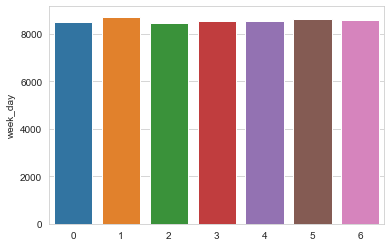

In [611]:
day = df['week_day'].value_counts()
sns.barplot(x = day.index, y = day)

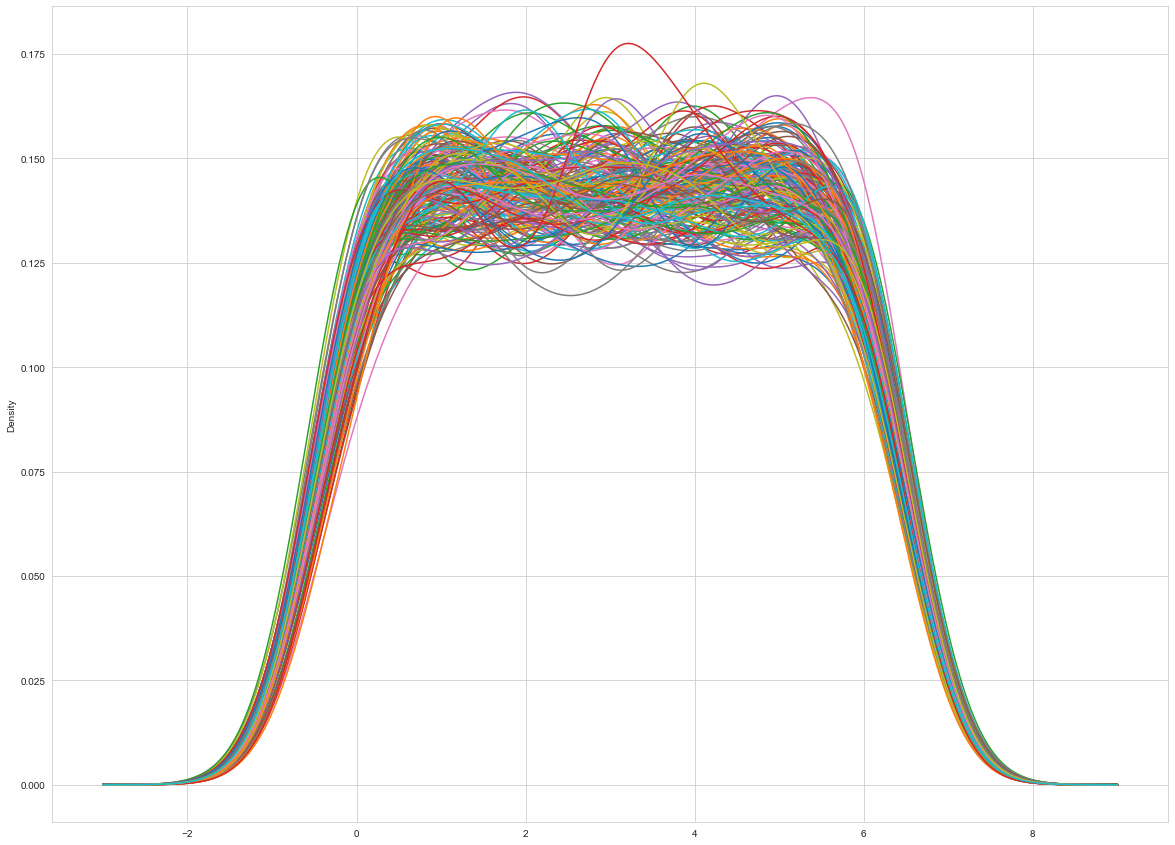

In [614]:
df.groupby('user_id')['week_day'].plot.density(figsize = (20,15))
plt.show()

Time

In [616]:
df['hour'] = df['time'].apply(lambda x: pd.to_datetime(x).hour + pd.to_datetime(x).minute/60)
df = df.drop('time', axis = 1)

Distribution of hours for all dataset grouped by user_id

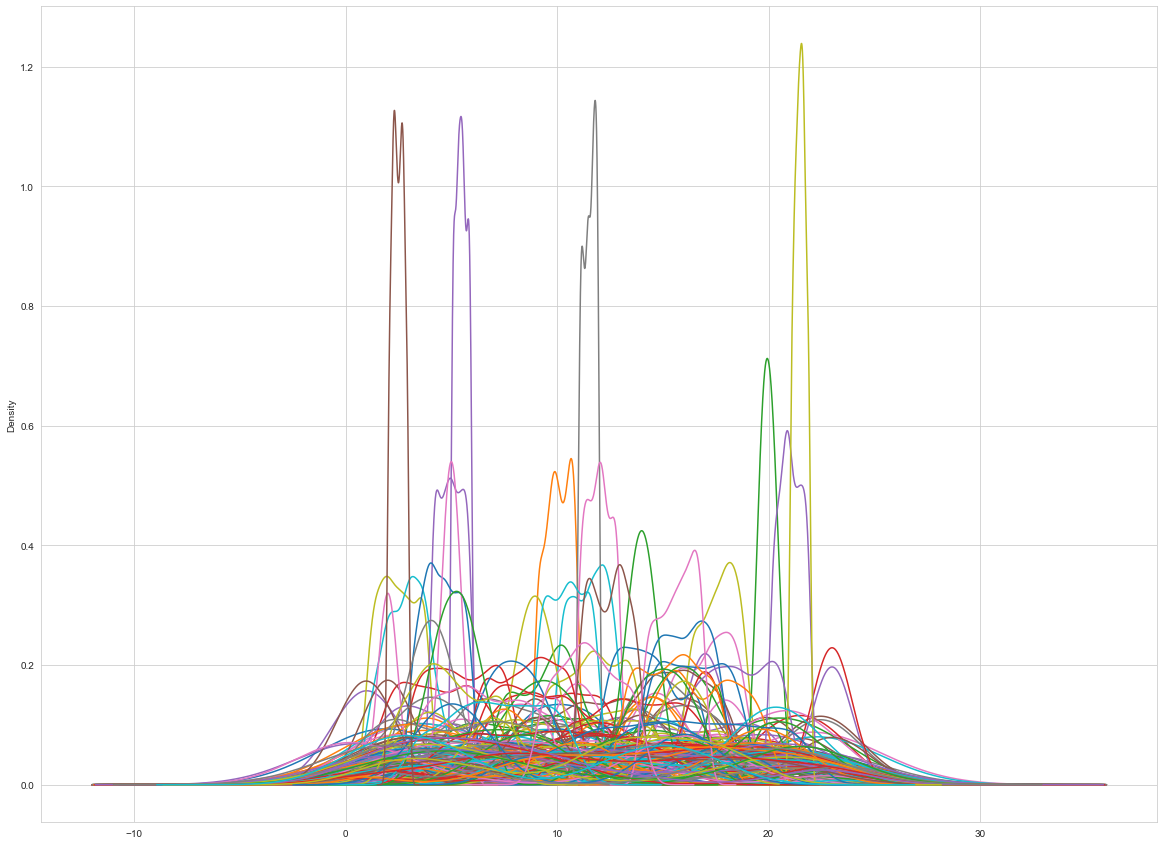

In [619]:
df.groupby('user_id')['hour'].plot.density(figsize = (20,15))
plt.show()

In [564]:
df

,browser,os,locale,user_id,gender,location,sites,week_day,hour
0,Firefox,Ubuntu,ru_RU,105,m,USA/Chicago,"[{'site': 'mail.google.com', 'length': 50}, {'...",6,9.050000
1,Firefox,Windows 8,pl-PL,11,m,USA/Chicago,"[{'site': 'meduza.org', 'length': 40}, {'site'...",2,13.950000
2,Chrome,Ubuntu,zh-CN,17,m,Singapore/Singapore,"[{'site': 'facebook.net', 'length': 74}, {'sit...",1,2.100000
3,Firefox,Windows 10,en-SG,92,f,USA/Chicago,"[{'site': 'live.com', 'length': 79}, {'site': ...",2,0.083333
4,Internet Explorer,Windows 8,xh-ZA,120,m,France/Paris,"[{'site': 'cnn.com', 'length': 65}, {'site': '...",1,14.916667
...,...,...,...,...,...,...,...,...,...
59995,Chrome,Windows 8,en-SG,60,f,USA/Chicago,"[{'site': 'toptal.com', 'length': 191}, {'site...",0,14.983333
59996,Chrome,Windows 10,pt-PT,178,m,New Zealand/Auckland,"[{'site': 'vk.com', 'length': 126}, {'site': '...",4,6.033333
59997,Safari,MacOS,it-IT,32,m,Netherlands/Amsterdam,"[{'site': 'slack.com', 'length': 74}, {'site':...",4,10.450000
59998,Firefox,Windows 10,ru_RU,56,m,France/Paris,"[{'site': 'lenta.ru', 'length': 82}, {'site': ...",1,14.283333


Split location to city and country

In [565]:
x = df['location'].apply(lambda x: x.split("/"))
x = x.to_list()
names = ["Country", "City"]
new_df = pd.DataFrame(x, columns=names)
new_df

,Country,City
0,USA,Chicago
1,USA,Chicago
2,Singapore,Singapore
3,USA,Chicago
4,France,Paris
...,...,...
59995,USA,Chicago
59996,New Zealand,Auckland
59997,Netherlands,Amsterdam
59998,France,Paris


## Candidates for being Joe:
- browser = ('Firefox','Chrome')
- os = ('Ubuntu','Windows 10')
- locale = ('ru_RU')
- gender = ('m')
- location = (Usa/Chicago, France/Paris, Canada/Toronto)

In [627]:
df_candidates = df[df["browser"].isin(["Chrome", "Firefox"]) &
        df["os"].isin(["Windows 10", "Ubuntu"]) &
        (df["locale"] == "ru_RU") &
        (df["gender"] == "m") &
        df["location"].isin(["France/Paris", "USA/Chicago", "Canada/Toronto"])]

df_candidates['user_id'].value_counts()

192    312
56     306
105    302
181    300
15     299
111    297
0      294
82     293
69     122
Name: user_id, dtype: int64

In [628]:
df_candidates['Joe'] = df_candidates['user_id'].apply(lambda x: 0 if x == 0 else 1)
df_candidates

/var/folders/kj/z66l9p5n1gj57z83zdxbnnsm0000gn/T/ipykernel_1316/1170202130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_candidates['Joe'] = df_candidates['user_id'].apply(lambda x: 0 if x == 0 else 1)


,browser,os,locale,user_id,gender,location,sites,week_day,hour,Joe
0,Firefox,Ubuntu,ru_RU,105,m,USA/Chicago,"[{'site': 'mail.google.com', 'length': 50}, {'...",6,9.050000,1
69,Chrome,Ubuntu,ru_RU,15,m,France/Paris,"[{'site': 'lenta.ru', 'length': 279}, {'site':...",4,19.233333,1
125,Chrome,Ubuntu,ru_RU,82,m,USA/Chicago,"[{'site': 'mail.google.com', 'length': 59}, {'...",4,21.366667,1
146,Chrome,Windows 10,ru_RU,0,m,USA/Chicago,"[{'site': 'youtube.com', 'length': 71}, {'site...",1,18.433333,0
147,Firefox,Windows 10,ru_RU,0,m,Canada/Toronto,"[{'site': 'mail.google.com', 'length': 140}, {...",5,16.950000,0
...,...,...,...,...,...,...,...,...,...,...
59934,Firefox,Windows 10,ru_RU,15,m,France/Paris,"[{'site': 'lenta.ru', 'length': 75}, {'site': ...",6,20.650000,1
59946,Firefox,Ubuntu,ru_RU,0,m,USA/Chicago,"[{'site': 'mail.google.com', 'length': 80}, {'...",0,17.766667,0
59981,Chrome,Windows 10,ru_RU,192,m,France/Paris,"[{'site': 'vk.com', 'length': 51}, {'site': 'y...",5,0.466667,1
59985,Chrome,Windows 10,ru_RU,0,m,USA/Chicago,"[{'site': 'vk.com', 'length': 109}, {'site': '...",1,2.583333,0


In [629]:
df_candidates['Joe'].value_counts()

1    2231
0     294
Name: Joe, dtype: int64

### Activity on sites

In [630]:
for user in df_candidates["user_id"].unique():
    temp_sites = {}
    for s in df_candidates[df_candidates["user_id"] == user]["sites"]:
        for site in s:
            if site["site"] not in temp_sites:
                temp_sites[site["site"]] = 0
            temp_sites[site["site"]] += 1
    print("-"*50)
    print(user)
    print(len(temp_sites), sum(temp_sites.values()))
    top_sites = {key:temp_sites[key] for key in temp_sites if temp_sites[key]>3}
    print(top_sites)
    print(sorted(top_sites.keys()))

--------------------------------------------------
105
882 2220
{'mail.google.com': 259, 'toptal.com': 261, 'slack.com': 264, 'lenta.ru': 260, 'youtube.com': 262}
['lenta.ru', 'mail.google.com', 'slack.com', 'toptal.com', 'youtube.com']
--------------------------------------------------
15
857 2438
{'lenta.ru': 258, 'toptal.com': 257, 'mail.google.com': 254, 'vk.com': 261, 'youtube.com': 261, 'slack.com': 264}
['lenta.ru', 'mail.google.com', 'slack.com', 'toptal.com', 'vk.com', 'youtube.com']
--------------------------------------------------
82
891 2471
{'mail.google.com': 259, 'vk.com': 256, 'lenta.ru': 252, 'toptal.com': 261, 'slack.com': 260, 'youtube.com': 253}
['lenta.ru', 'mail.google.com', 'slack.com', 'toptal.com', 'vk.com', 'youtube.com']
--------------------------------------------------
0
874 2454
{'youtube.com': 256, 'vk.com': 259, 'mail.google.com': 253, 'toptal.com': 263, 'slack.com': 261, 'lenta.ru': 261}
['lenta.ru', 'mail.google.com', 'slack.com', 'toptal.com', 'vk.co

In [644]:
temp_sites = {}
Joe_id = 0
for s in df_candidates[df_candidates["user_id"] == Joe_id]["sites"]:
    for site in s:
        if site["site"] not in temp_sites:
            temp_sites[site["site"]] = 0
        temp_sites[site["site"]] += 1
print('User Id =',Joe_id)
print(len(temp_sites)) 
print(sum(temp_sites.values()))
top_sites = {key:temp_sites[key] for key in temp_sites if temp_sites[key]>2}
print(top_sites)
print(sorted(top_sites.keys()))

User Id = 0
874
2454
{'youtube.com': 256, 'vk.com': 259, 'mail.google.com': 253, 'toptal.com': 263, 'slack.com': 261, 'lenta.ru': 261}
['lenta.ru', 'mail.google.com', 'slack.com', 'toptal.com', 'vk.com', 'youtube.com']


### Joe's most popular 6 sites: 'lenta.ru', 'mail.google.com', 'slack.com', 'toptal.com', 'vk.com', 'youtube.com'

How much time user spend on those 6 most popular for Joe sites

In [638]:
site_names = ['lenta.ru', 'mail.google.com', 'slack.com', 'toptal.com', 'vk.com', 'youtube.com']

def get_sites(s):
    list =[0] * len(site_names)
    for site in s:
        if site['site'] in site_names:
            idx = site_names.index(site['site'])
            list[idx] += site['length']
    return pd.Series(list, index=site_names)

df_candidates[site_names] = df_candidates['sites'].apply(lambda x: get_sites(x))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


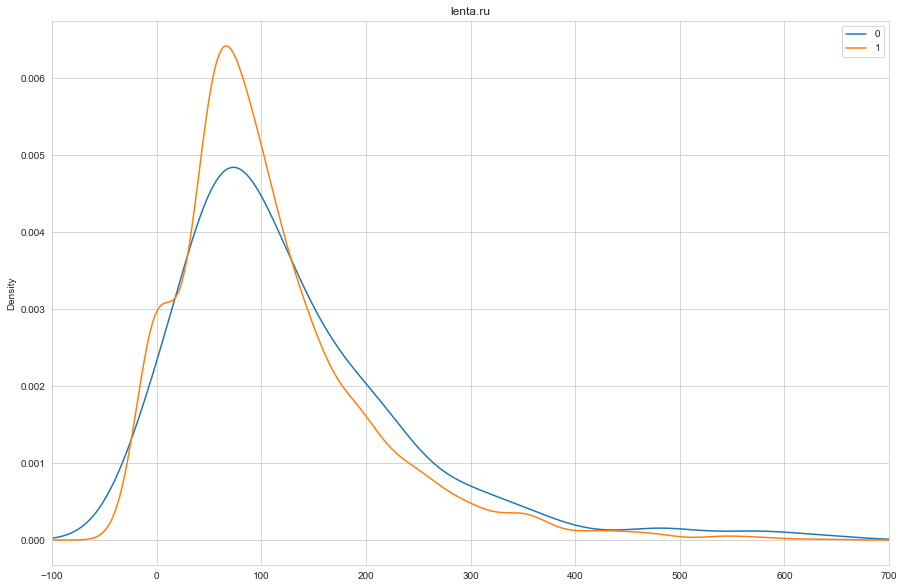

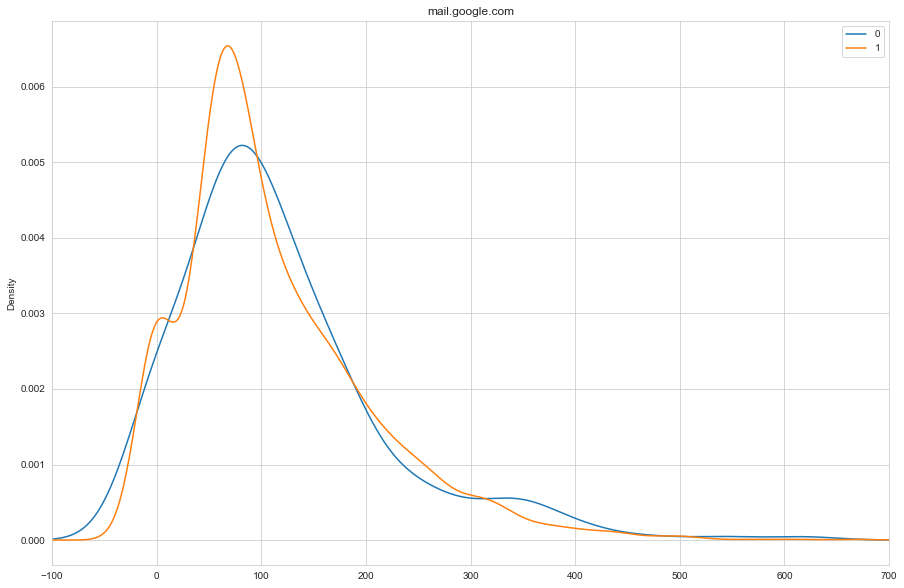

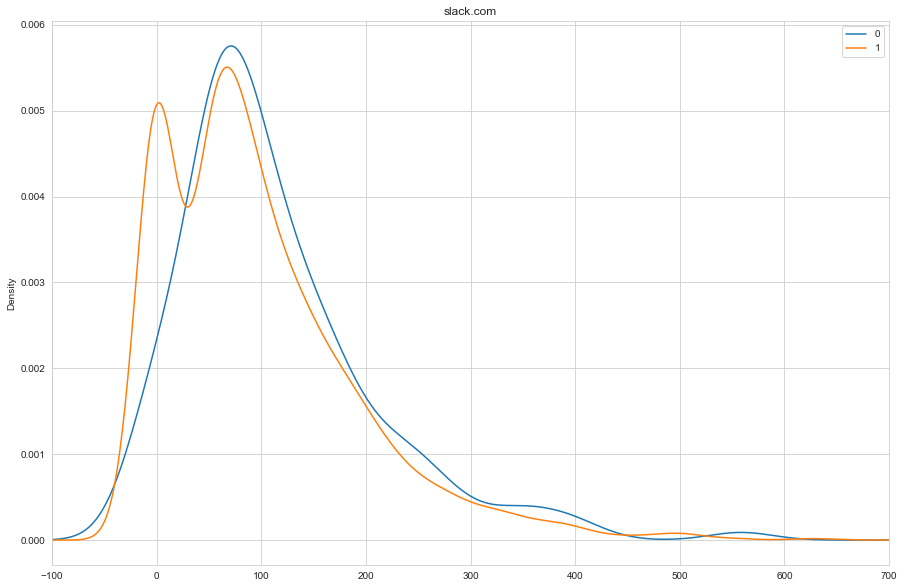

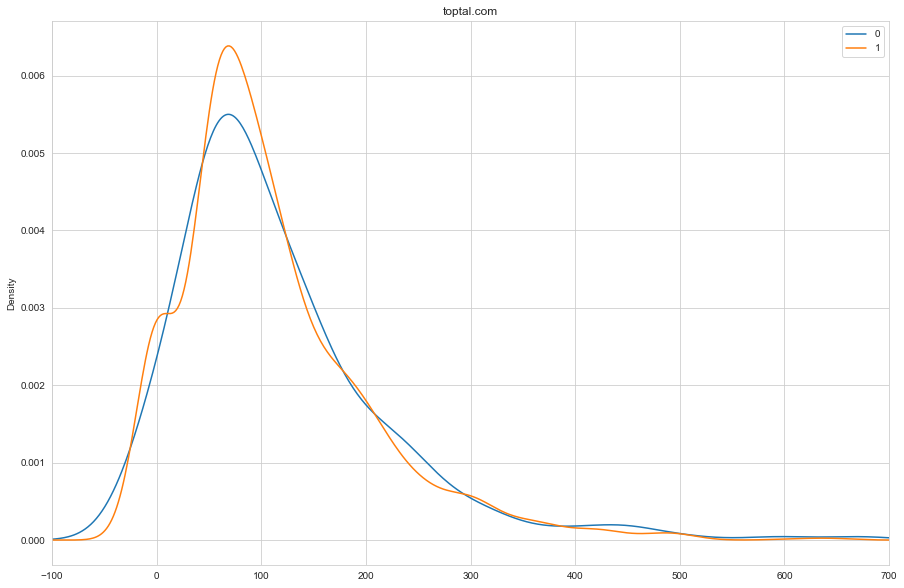

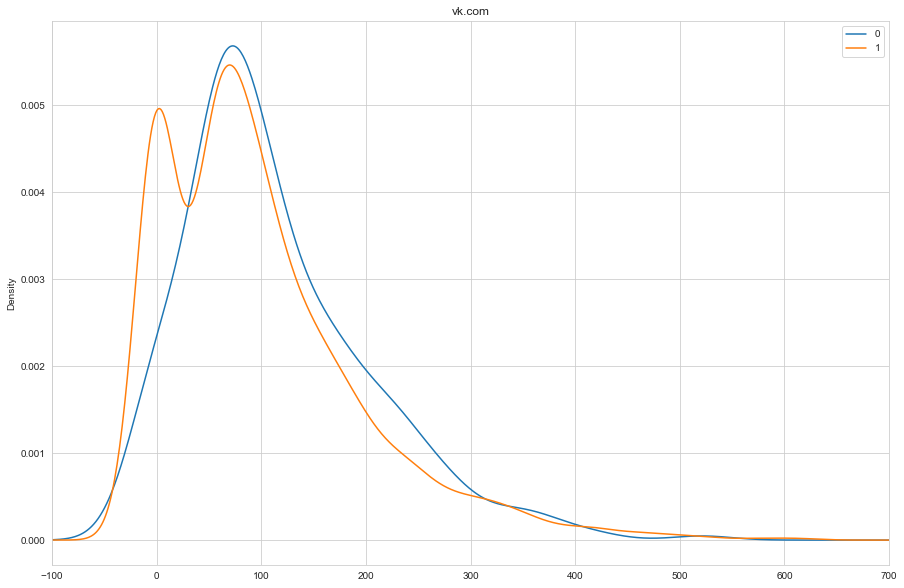

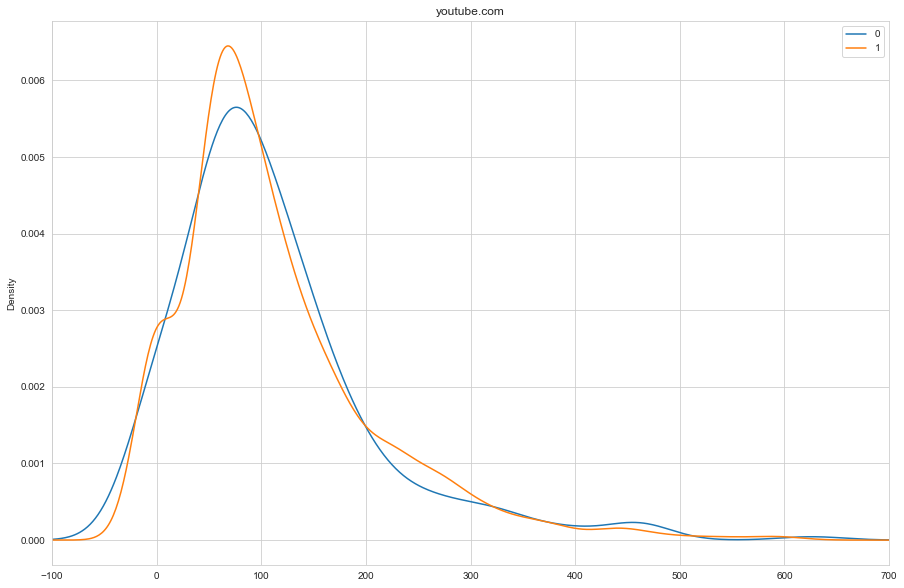

In [572]:
for site_name in site_names:
    g = df_candidates.groupby('Joe')
    g = g.filter(lambda x: x[site_name].mean() > 0)
    g.groupby("Joe")[site_name].plot.density(figsize=(15,10), legend = True, xlim = (-100,700), title = site_name)
    plt.show()

In [573]:
df_candidates = df_candidates.drop('sites', axis = 1)
df_candidates

,browser,os,locale,user_id,gender,location,week_day,hour,Joe,lenta.ru,mail.google.com,slack.com,toptal.com,vk.com,youtube.com
0,Firefox,Ubuntu,ru_RU,105,m,USA/Chicago,6,9.050000,1,59,50,65,132,0,67
69,Chrome,Ubuntu,ru_RU,15,m,France/Paris,4,19.233333,1,279,99,62,92,85,82
125,Chrome,Ubuntu,ru_RU,82,m,USA/Chicago,4,21.366667,1,62,59,88,96,191,123
146,Chrome,Windows 10,ru_RU,0,m,USA/Chicago,1,18.433333,0,0,0,0,0,120,71
147,Firefox,Windows 10,ru_RU,0,m,Canada/Toronto,5,16.950000,0,160,140,46,49,45,208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59934,Firefox,Windows 10,ru_RU,15,m,France/Paris,6,20.650000,1,75,65,104,87,72,88
59946,Firefox,Ubuntu,ru_RU,0,m,USA/Chicago,0,17.766667,0,75,80,415,157,151,52
59981,Chrome,Windows 10,ru_RU,192,m,France/Paris,5,0.466667,1,0,0,45,0,51,54
59985,Chrome,Windows 10,ru_RU,0,m,USA/Chicago,1,2.583333,0,214,543,146,60,109,58


## Order in with Joe visited sites

In [661]:

temp_lens = {key:{key:0 for key in range(13)} for key in site_names + ["other", "none"]}
for s in df_candidates[df_candidates["user_id"] == 0]["sites"]:
    for i, site in enumerate(s):
        if site["site"] in site_names:
            temp_lens[site["site"]][i] += 1
        else:
            temp_lens['other'][i] += 1
    for i in range(len(s), 13):
        temp_lens['none'][i] += 1
print("-"*80)
print(user)
display(pd.DataFrame(temp_lens))

--------------------------------------------------------------------------------
0


,lenta.ru,mail.google.com,slack.com,toptal.com,vk.com,youtube.com,other,none
0,8,220,13,11,33,9,0,0
1,10,23,7,45,198,11,0,0
2,43,7,1,186,25,4,26,2
3,172,1,55,16,0,4,38,8
4,12,0,76,0,1,17,173,15
5,11,0,41,1,0,63,147,31
6,3,0,36,1,2,43,134,75
7,1,1,18,0,0,30,135,109
8,1,1,6,1,0,27,104,154
9,0,0,4,0,0,23,76,191


In [574]:
df_candidates['user_id'].value_counts()

192    312
56     306
105    302
181    300
15     299
111    297
0      294
82     293
69     122
Name: user_id, dtype: int64

In [575]:
df_candidates.locale.value_counts()

ru_RU    2525
Name: locale, dtype: int64

# Dataset for model training

In [576]:
df1 = pd.DataFrame()
df1

df1['browser'] = df_candidates['browser'].apply(lambda x: 1 if x == 'Chrome' else 0)
df1['os'] = df_candidates['os'].apply(lambda x: 1 if x == 'Windows 10' else 0)
df1['Joe'] = df_candidates['Joe']
df1[site_names] = df_candidates[site_names]
df1['week_day'] = df_candidates['week_day']
df1['hour'] = df_candidates['hour']
df1.reset_index(drop = True)


,browser,os,Joe,lenta.ru,mail.google.com,slack.com,toptal.com,vk.com,youtube.com,week_day,hour
0,0,0,1,59,50,65,132,0,67,6,9.050000
1,1,0,1,279,99,62,92,85,82,4,19.233333
2,1,0,1,62,59,88,96,191,123,4,21.366667
3,1,1,0,0,0,0,0,120,71,1,18.433333
4,0,1,0,160,140,46,49,45,208,5,16.950000
...,...,...,...,...,...,...,...,...,...,...,...
2520,0,1,1,75,65,104,87,72,88,6,20.650000
2521,0,0,0,75,80,415,157,151,52,0,17.766667
2522,1,1,1,0,0,45,0,51,54,5,0.466667
2523,1,1,0,214,543,146,60,109,58,1,2.583333


In [577]:
y = df_candidates['Joe'].reset_index(drop = True)
X = df.drop('Joe', axis = 1)
print(X)

       browser  os  lenta.ru  mail.google.com  slack.com  toptal.com  vk.com  \
0            0   0        59               50         65         132       0   
69           1   0       279               99         62          92      85   
125          1   0        62               59         88          96     191   
146          1   1         0                0          0           0     120   
147          0   1       160              140         46          49      45   
...        ...  ..       ...              ...        ...         ...     ...   
59934        0   1        75               65        104          87      72   
59946        0   0        75               80        415         157     151   
59981        1   1         0                0         45           0      51   
59985        1   1       214              543        146          60     109   
59998        0   1        82              127          0         103     133   

       youtube.com  week_day       hour

# Test model - for dataset with candidates only

Importing packages

In [596]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, f1_score

Split dataset to train and validation sets

In [579]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state= 42)

In [580]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [581]:
print(roc_auc_score(y_test, y_pred))

0.5746120058565154


In [582]:
confusion_matrix(y_test,y_pred)

array([[ 18,  57],
       [ 62, 621]])

In [583]:
y_test

1953    1
748     1
194     1
962     1
1325    1
       ..
1561    1
1186    1
13      1
1393    1
1448    1
Name: Joe, Length: 758, dtype: int64

In [584]:
scores = cross_validate(model, X_test, y_test, scoring=('balanced_accuracy'), return_train_score=True)
scores_summary = pd.DataFrame([[scores["train_score"].mean(), scores["train_score"].std()], 
                               [scores["test_score"].mean(), scores["test_score"].std()]], 
                                index=["train", "validation"], columns = ["mean", "std"])
print(model)
display(scores_summary)


DecisionTreeClassifier()


,mean,std
train,1.000000,0.000000
validation,0.530285,0.067441


In [585]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, make_scorer

grid = GridSearchCV(
    estimator = DecisionTreeClassifier(),
    param_grid = {'criterion' : ['gini','entropy'],
                'max_depth' : range(5,12),
                'min_samples_leaf' : [2, 5, 10, 20, 50],
                'min_samples_split' : [2, 5, 10, 20, 50]},
    scoring = {'precision' : make_scorer(precision_score), 'recall_score' : make_scorer(recall_score)},
    refit = 'precision',
    cv = 4,
    n_jobs = -1
)

grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)

In [586]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_precision,...,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall_score,split1_test_recall_score,split2_test_recall_score,split3_test_recall_score,mean_test_recall_score,std_test_recall_score,rank_test_recall_score
0,0.010538,0.002780,0.006297,0.000769,gini,5,2,2,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.893868,...,0.889392,0.008937,219,0.979328,0.981912,0.974160,0.966408,0.975452,0.005921,117
1,0.009068,0.001128,0.007484,0.003579,gini,5,2,5,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.893868,...,0.889320,0.009049,221,0.979328,0.979328,0.974160,0.966408,0.974806,0.005288,119
2,0.011486,0.002525,0.006312,0.000311,gini,5,2,10,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.893868,...,0.889320,0.009049,221,0.979328,0.979328,0.974160,0.966408,0.974806,0.005288,119
3,0.011031,0.003030,0.006312,0.000586,gini,5,2,20,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.892019,...,0.889890,0.009040,172,0.981912,0.987080,0.968992,0.961240,0.974806,0.010234,121
4,0.009073,0.001490,0.011863,0.005207,gini,5,2,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.892019,...,0.890799,0.009745,142,0.981912,0.994832,0.968992,0.966408,0.978036,0.011337,108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,0.008813,0.000907,0.007712,0.001408,entropy,11,50,2,"{'criterion': 'entropy', 'max_depth': 11, 'min...",0.891509,...,0.887120,0.007229,242,0.976744,0.971576,1.000000,0.987080,0.983850,0.010867,71
346,0.007859,0.000186,0.006709,0.001712,entropy,11,50,5,"{'criterion': 'entropy', 'max_depth': 11, 'min...",0.891509,...,0.887120,0.007229,242,0.976744,0.971576,1.000000,0.987080,0.983850,0.010867,71
347,0.008841,0.000942,0.005136,0.000228,entropy,11,50,10,"{'criterion': 'entropy', 'max_depth': 11, 'min...",0.891509,...,0.887120,0.007229,242,0.976744,0.971576,1.000000,0.987080,0.983850,0.010867,71
348,0.007917,0.000285,0.007324,0.002293,entropy,11,50,20,"{'criterion': 'entropy', 'max_depth': 11, 'min...",0.891509,...,0.887120,0.007229,242,0.976744,0.971576,1.000000,0.987080,0.983850,0.010867,71


In [587]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.9019407357155957


In [597]:
f1_score(y_test,y_pred)

0.9125642909625276

In [598]:
roc_auc_score(y_test,y_pred)

0.5746120058565154

# Model for whole dataset

In [588]:
site_names = ['lenta.ru', 'mail.google.com', 'slack.com', 'toptal.com', 'vk.com', 'youtube.com']

def get_sites(s):
    list =[0] * len(site_names)
    for site in s:
        if site['site'] in site_names:
            idx = site_names.index(site['site'])
            list[idx] += site['length']
    return pd.Series(list, index=site_names)

df[site_names] = df['sites'].apply(lambda x: get_sites(x))

TypeError: 'int' object is not subscriptable

<Figure size 864x288 with 0 Axes>